In [1]:
import networkx as nx
import pandas as pd 

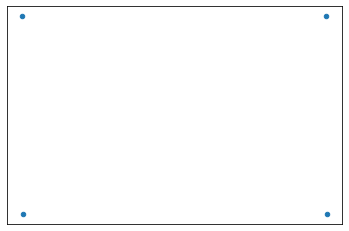

In [2]:
G = nx.complete_graph(4)
pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility
nx.draw_networkx_nodes(G, pos, node_size=20)

In [3]:
G

In [4]:
import textrank as tr
import sys
sys.path.append('../') 
from retrieval.utterance_encoder import sbert_encoder
from retrieval.similarity_calc import cossim_score

In [5]:
df = pd.read_csv("cleaned_output.csv")

In [6]:
df

,encounter_id,dialogue,clean_dialogue
0,[doctor],"hi, martha . how are you ?","hi, martha . how are you ?"
1,[patient],i'm um doing okay . how are you ?,i am doing okay . how are you ?
2,[patient],okay .,okay .
3,[doctor],martha is a 50-year-old female with a past med...,martha is a 50-year-old female with a past med...
4,[patient],i'm doing well . i've been traveling a lot rec...,i am doing . i have been traveling a lot rece...
5,[doctor],nice . that's great . i'm glad to hear that yo...,nice . that's great . i am glad to hear that y...
6,[patient],"yes , fall foliage is the best .","yes , fall foliage is the best ."


In [7]:
sentences = df["clean_dialogue"]

In [8]:
s = sbert_encoder(list(sentences))
mat = cossim_score(s)

In [9]:
G = tr.Graph(mat)

In [10]:
G._construct_from_sim()

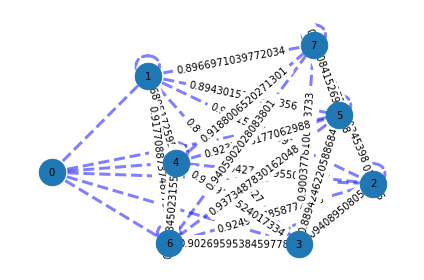

In [12]:
G._draw_graph()

In [22]:

pagerank_scores = nx.pagerank(G.G, weight='weight')

# Sort nodes based on the PageRank score in descending order
ranked_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

In [23]:
nx.pagerank(G.G, weight='weight')

{0: 0.1069389307218875,
 1: 0.1298434688290886,
 2: 0.12974596964734536,
 3: 0.1283145271653073,
 4: 0.13113802369130223,
 5: 0.12930171681810154,
 6: 0.13068386349271377,
 7: 0.11403349963425367}

In [25]:
# Print the ranked nodes based on PageRank scores
print("Ranked Sentences based on PageRank:")
for node, score in ranked_nodes:
    print(f"Node {node}: PageRank score = {score:.4f}")

Ranked Sentences based on PageRank:
Node 4: PageRank score = 0.1311
Node 6: PageRank score = 0.1307
Node 1: PageRank score = 0.1298
Node 2: PageRank score = 0.1297
Node 5: PageRank score = 0.1293
Node 3: PageRank score = 0.1283
Node 7: PageRank score = 0.1140
Node 0: PageRank score = 0.1069


In [32]:
top_sentence_indices = [node for node, score in ranked_nodes[:3]]
        
# Retrieve the sentences based on the ranked indices
top_sentences = [sentences[i-1] for i in top_sentence_indices]  # `i-1` because nodes start from 1

# Join the top sentences into a summary
summary = " ".join(top_sentences)

In [33]:
summary

"martha is a 50-year-old female with a past medical history significant for congestive heart failure , depression and hypertension who presents for her annual exam . so , martha , it is been a year since i have seen you . how are you doing ? nice . that's great . i am glad to hear that you are staying active ,  . i just love this weather . i am so happy the summer is over . i am definitely more of a fall person . hi, martha . how are you ?"